In [4]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

Using TensorFlow backend.


11493376/11490434 [==============================] - 9s 1us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.7788 - acc: 0.8051 - val_loss: 0.3248 - val_acc: 0.9082
Epoch 2/10
 - 1s - loss: 0.3039 - acc: 0.9141 - val_loss: 0.2519 - val_acc: 0.9318
Epoch 3/10
 - 1s - loss: 0.2423 - acc: 0.9316 - val_loss: 0.2133 - val_acc: 0.9418
Epoch 4/10
 - 1s - loss: 0.2026 - acc: 0.9430 - val_loss: 0.1820 - val_acc: 0.9513
Epoch 5/10
 - 1s - loss: 0.1715 - acc: 0.9517 - val_loss: 0.1630 - val_acc: 0.9556
Epoch 6/10
 - 1s - loss: 0.1478 - acc: 0.9590 - val_loss: 0.1467 - val_acc: 0.9593
Epoch 7/10
 - 1s - loss: 0.1292 - acc: 0.9642 - val_loss: 0.1382 - val_acc: 0.9623
Epoch 8/10
 - 1s - loss: 0.1144 - acc: 0.9684 - val_loss: 0.1253 - val_acc: 0.9642
Epoch 9/10
 - 1s - loss: 0.1005 - acc: 0.9732 - val_loss: 0.1170 - val_acc: 0.9661
Epoch 10/10
 - 1s 

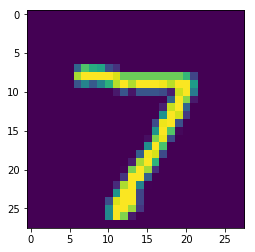

In [5]:
plt.imshow(X_test[0])
plt.show()